# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

**Цель**

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.


**Что известно на данном этапе**

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года

* лог сервера с данными об их посещениях (файл visits_info_short.csv)

* выгрузка их покупок за этот период (файл orders_info_short.csv)

* рекламные расходы (файл costs_info_short.csv)


**Что будем делать**


Поделим анализ на 4 этапа:

1) Обзор и предобработка данных;

2) Исследовательский анализ данных;


3) Анализ маркетинговых расходов;


4) Оценка окупаемости рекламы.

## Изучаем данные из файлов

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [2]:
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [3]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [4]:
costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Вывод:
Мы проанализировали исходные данные трех датасетов. Пропусков в датасетах не обнаружено. Но есть несколько вещей, которые стоит поправить, для комфортной  работы:


**1)** Тип данных. В некоторых столбцах он не корректный (Пример: столбцы с датами имеют тип object)


**2)** Отсутствие единого змеиного стиля


**3)** Также проверим датасеты на дубликаты

Теперь предобработаем данные

### Предобработка данных

In [5]:
#проверим датасеты на явные дубликаты
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

In [6]:
#создадим функцию для приведения данных к нижнему регистру
#чтобы на первых парах не копипастить много кода
def snake_style(data):
    snake_st = data.set_axis(data.columns.str.lower(), axis='columns', inplace=True)

In [7]:
#приведем данные к нижнему регистру
snake_style(visits)
snake_style(orders)
snake_style(costs)
#подправим названия столбцов
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [8]:
#преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Вывод. Мы выполнили поставленные задачи выше из блока предобработки данных. А именно:

*  Преобразовали типы данных

*  Привели данные к единому "змеиному стилю"

*  Проверили датасеты на дубликаты


Данные подготовлены к анализу

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функции для вычисления метрик и построения графиков

In [9]:
def get_profiles(sessions, orders, costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
                    {
                        'session_start' : 'first',
                        'channel' : 'first',
                        'device' : 'first',
                        'region' : 'first'
                    }
                )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
               )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Пользователи')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Пользователи')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Пользователи')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Пользователи')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('Пользователи')
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Пользователи')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('Пользователи')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Пользователи')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Пользователи')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Пользователи')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.ylabel('Пользователи')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Построим профили пользователей с использованием введенной функции.

Данные содержат информацию о новых пользователях, пришедших с 1 мая по 27 октября 2019 года. В нашем исследовании мы принимаем за горизонт анализа 2 недели, а за точку наблюдения - 1 ноября.

In [18]:
#составим профили пользователей.
#Определим минимальную и максимальную даты привлечения
# находим параметры первых посещений
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Определеим максимальную и минимальную дату привлечения

In [19]:
print(f'Миниимальная дата привлечения пользователей: {profiles.first_ts.dt.date.min()}', 
     f'Максимальная дата привлечения пользователей: {profiles.first_ts.dt.date.max()}', sep = '\n')

Миниимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


**Вывод:** Профили пользователей получены. Привлечение осуществлялось с 1 мая по 27 октября 2019 года. Видим, что данные не противоречат условиям нашего проекта и совпадают с датами в тех.задании

### Распределение пользователей по странам

Теперь, выясним:

**1)** Из каких стран приходят по? Какие страны дают больше всего платящих пользователей?



**2)** Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?



**3)** По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [20]:
#из каких стран приходят пользователи
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [21]:
# Какие страны дают больше всего платящих пользователей?
# в какой стране доля покупателей среди пользователей наибольшая?
users_from_region = (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left'))

users_from_region.set_axis(['region', 'total_users', 'payers'], axis='columns', inplace=True)
users_from_region['payer_rate'] = users_from_region['payers'] / users_from_region['total_users']
users_from_region['payer_rate'] = [f'{x:,.2%}' for x in users_from_region['payer_rate']]
display(users_from_region.sort_values(by='payer_rate', ascending=False))

,region,total_users,payers,payer_rate
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


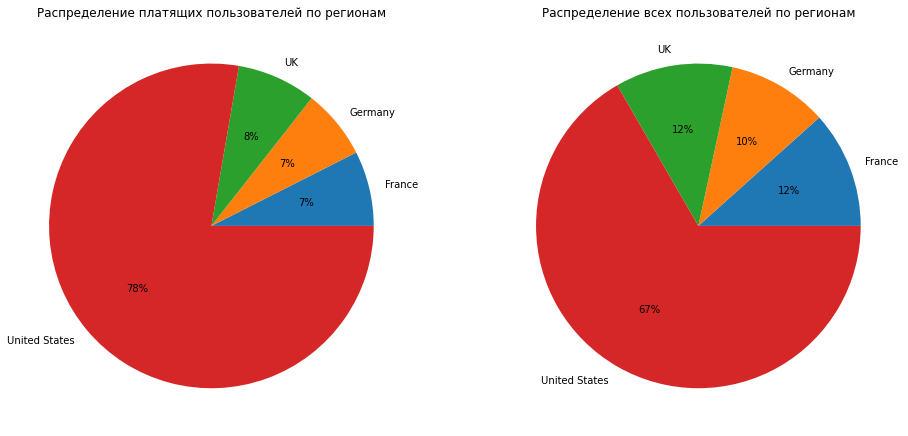

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
ax1.pie(users_from_region['payers'], labels=users_from_region['region'], autopct='%1.0f%%')
ax1.set_title('Распределение платящих пользователей по регионам')
ax2.pie(users_from_region['total_users'], labels=users_from_region['region'], autopct='%1.0f%%')
ax2.set_title('Распределение всех пользователей по регионам')
plt.show()

Большинство привлеченных пользователей - из США. Штаты также с большим отрывом лидируют и по количеству платящих пользователей. Великобритания и Фрация практически индентичны в показателях. В отстающих - Германия, но по кол-ву платящих пользователей, занимает второе место, после США

### Распределение пользователей по устройствам

Проделаем аналогичное упражнение с устройствами пользователей

In [23]:
#какими устройствами пользуются клиенты
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [24]:
region_device = (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), 
           on = 'device', how = 'left'))

region_device.set_axis(['device', 'total_users', 'payers'], axis='columns', inplace=True)
region_device['payer_rate'] = region_device['payers'] / region_device['total_users']
region_device['payer_rate'] = [f'{x:,.2%}' for x in region_device['payer_rate']]
display(region_device.sort_values(by='payer_rate', ascending=False))

,device,total_users,payers,payer_rate
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


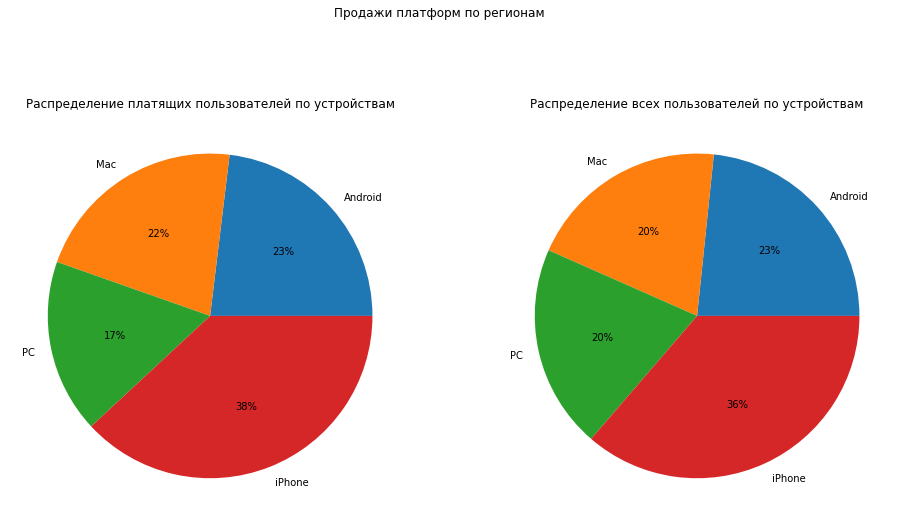

In [25]:
#визуализируем результат
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Продажи платформ по регионам')
ax1.pie(region_device['payers'], labels=region_device['device'], autopct='%1.0f%%')
ax1.set_title('Распределение платящих пользователей по устройствам')
ax2.pie(region_device['total_users'], labels=region_device['device'], autopct='%1.0f%%')
ax2.set_title('Распределение всех пользователей по устройствам')
plt.show()

Среди обеих категорий пользователей, больше всего владельцев iPhone. Но долю платящих пользователей возглавляют владельцы Mac

Посмотрим, как утройства разделены по регионам

In [26]:
fav_device = profiles.pivot_table(index='device', columns='region', values='user_id', aggfunc='nunique').reset_index()
fav_device

region,device,France,Germany,UK,United States
0,Android,5252,4440,5141,20199
1,Mac,1838,1584,1778,24842
2,PC,6940,5945,7138,10432
3,iPhone,3420,3012,3518,44529


Как мы видим, в Европе преобладающая часть пользователей предпочитают ПК и Android
в то время как в США - iPhone и Mac наиболее популярны.

### Распределения пользователей по каналам рекламы

Теперь проанализруем источники привлечения в регионах

In [27]:
#какие источники привлечения есть
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [28]:
region_channel = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), 
           on = 'channel', how = 'left'))

region_channel.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)
region_channel['payer_rate'] = region_channel['payers'] / region_channel['total_users']
display(region_channel.sort_values(by='payer_rate', ascending=False))

,channel,total_users,payers,payer_rate
1,FaceBoom,29144,3557,0.122049
0,AdNonSense,3880,440,0.113402
9,lambdaMediaAds,2149,225,0.104700
6,TipTop,19561,1878,0.096007
5,RocketSuperAds,4448,352,0.079137
7,WahooNetBanner,8553,453,0.052964
8,YRabbit,4312,165,0.038265
3,MediaTornado,4364,156,0.035747
2,LeapBob,8553,262,0.030633
4,OppleCreativeMedia,8605,233,0.027077


In [29]:
fav_channel = profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count').reset_index()
fav_channel

region,channel,France,Germany,UK,United States
0,AdNonSense,1366.0,1219.0,1295.0,NaN
1,FaceBoom,NaN,NaN,NaN,29144.0
2,LeapBob,2988.0,2519.0,3046.0,NaN
3,MediaTornado,NaN,NaN,NaN,4364.0
4,OppleCreativeMedia,2991.0,2562.0,3052.0,NaN
5,RocketSuperAds,NaN,NaN,NaN,4448.0
6,TipTop,NaN,NaN,NaN,19561.0
7,WahooNetBanner,2971.0,2579.0,3003.0,NaN
8,YRabbit,NaN,NaN,NaN,4312.0
9,lambdaMediaAds,742.0,649.0,758.0,NaN


Как мы видим, большинство каналов привлечения характерны либо только для Европы, либо только для США. 

* В данных информация о пользователях из четырех стран - США, Франции, Германии, Великобритания. 

* Подавляющее количество пользователей в США. Доли платящих пользователей в Европе не сильно отличается друг от друга. США также выделяется среди них, в большую сторону

* Платформы для использования имеем 4: Maк, Айфон, ПК и Андроид. Больше всего пользователей с айфонами, но платить за приложение готовы больше владельцы Маков. Также видна популярность устройств в разных регионах: Европа больше катирует ПК и Андроид, Америке же больше импанируют "яблочные" устройства  


* Всего рекламных каналов, по которым приходят пользователи, 10, если не считать органиков. По 5 для США и Европы. Среди площадок США наибольшее кол-во пользователей приходят из FaceBoom и TipTop. В Европе - WahooNetBanner

## Анализ маркетинга

В этом разделе ответим на следующие вопросы:

**1)** Сколько денег потратили на привлечение всего?

**2)** Сколько денег потрачено на каждый из источников и сколько удалось привлечь покупателей?


**3)** Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [30]:
#посчитаем общую сумму расходов на маркетинг
costs['costs'].sum().round(2)

105497.3

In [31]:
#посчитаем, сколько денег потратили на каждый источник
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [32]:
#создадим переменные недели и месяца для визуализации динамики изменений расходов
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month

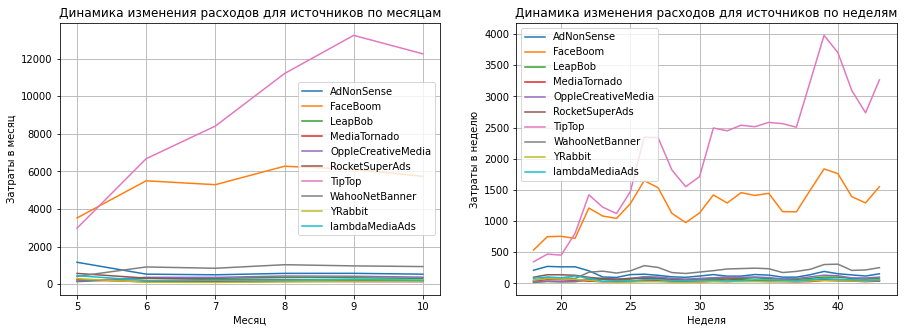

In [33]:
#визуализируем неделю
plt.figure(figsize = (15,5))
ax2 = plt.subplot(1,2,2)
cost_piv = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
cost_piv.plot(grid=True, ax = ax2)
plt.legend()
plt.ylabel('Затраты в неделю')
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов для источников по неделям')

#визуализируем месяц
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.ylabel('Затраты в месяц')
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов для источников по месяцам')
plt.show()

По графику видно, что на источники FaceBoom и Tip Top тратится средств больше всего. Также видно, что на FaceBoom изначально ставка была сделана больше, чем на Tip Top. Это видно по точкам стартовых трат. Но уже с 21 недели фокус вложений был переопределен на FaceBoom

Рассчитаем средний CAC на одного пользователя. Для этого используем профили пользователей без канала Organic, т.к. этот канал привлечения бесплатный для приложения

In [34]:
user_cac = (profiles.query('channel != "organic"')[['user_id', 'acquisition_cost']]
            .drop_duplicates()
            .agg({'acquisition_cost': 'mean'})
             )
user_cac

#тут же посмотрим сас для каналов привлечения
channels_cac = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )

print(channels_cac, user_cac)

                         cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000 acquisition_cost    1.127481
dtype: float64


Данные показывают, что дороже всего приложению обоходится пользователь, который пришел из канала Tip Top

## Окупаемость рекламы

### Окупаемость рекламы

 Для оценки стоимости привлечения одного покупателя воспользуемся функцией для подсчета LTV, CAC и ROI, и построим графики.

In [35]:
#исключим из анализа органиков, т.к. приложению они достаются, условно, бесплатно
profiles_no_org = profiles.query('channel != "organic"')

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа поставим в 14 дней, т.к.
#в задаче указано, что пользователи должны окупаться не позднее, чем через две недели после привлечения.

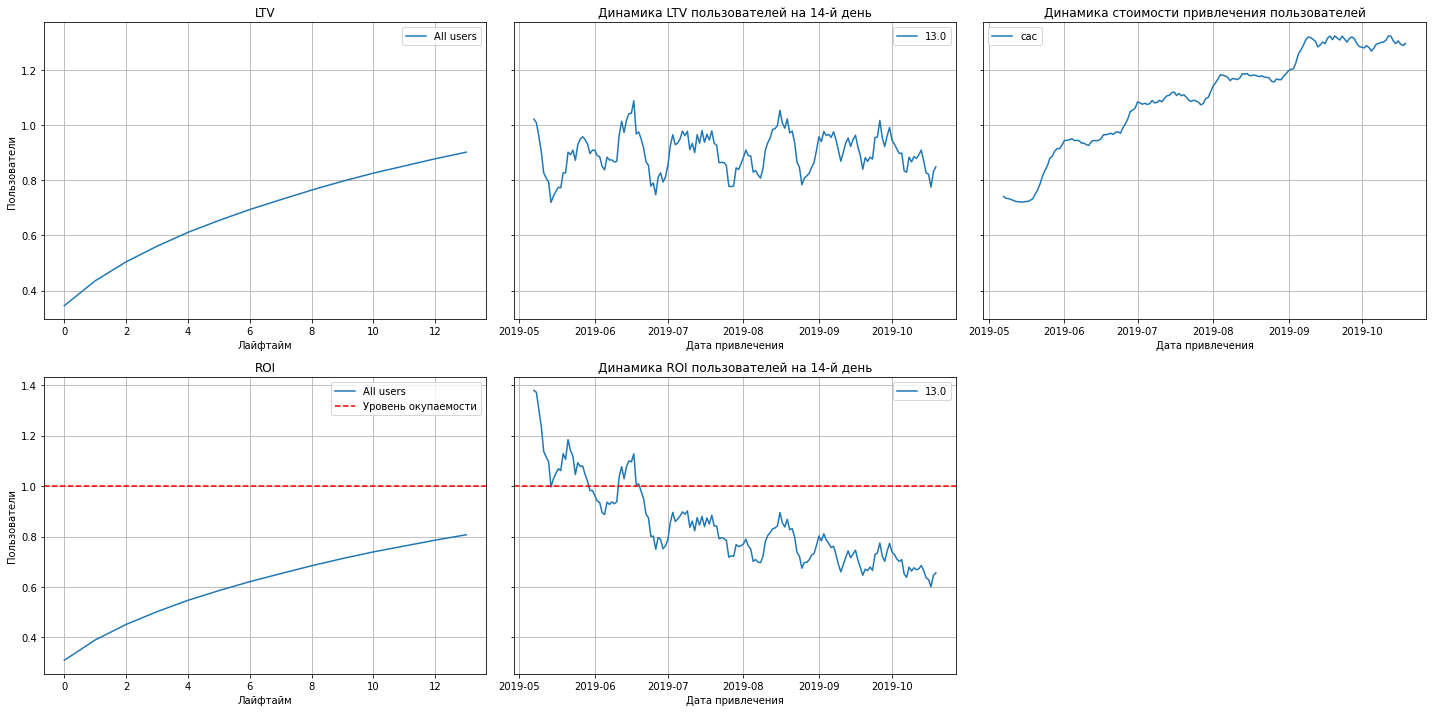

In [37]:
#считаем
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days
)
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Что можно сказать по этим графикам:
* Начиная с июня, «пожизненная ценность» пользователя выглядит более-менее стабильно. Значит, пользователи примерно одного качества;
* Реклама к 14-му дню и далее не преодолела порог окупаемости, не смотря на огромные вливания бюджета в рекламу;
* САС стремительно растет, причем скачками. Значит, рекламный бюджет увеличивается и рекламные кампании проходят регулярно;
* Начиная с июля привлеченные пользователи не привышают порог окупаемости в двух-недельном лайфтайме.

### Окупаемость с разбивкой по устройствам

Рассмотрим окупаемость с разбивкой по устройствам

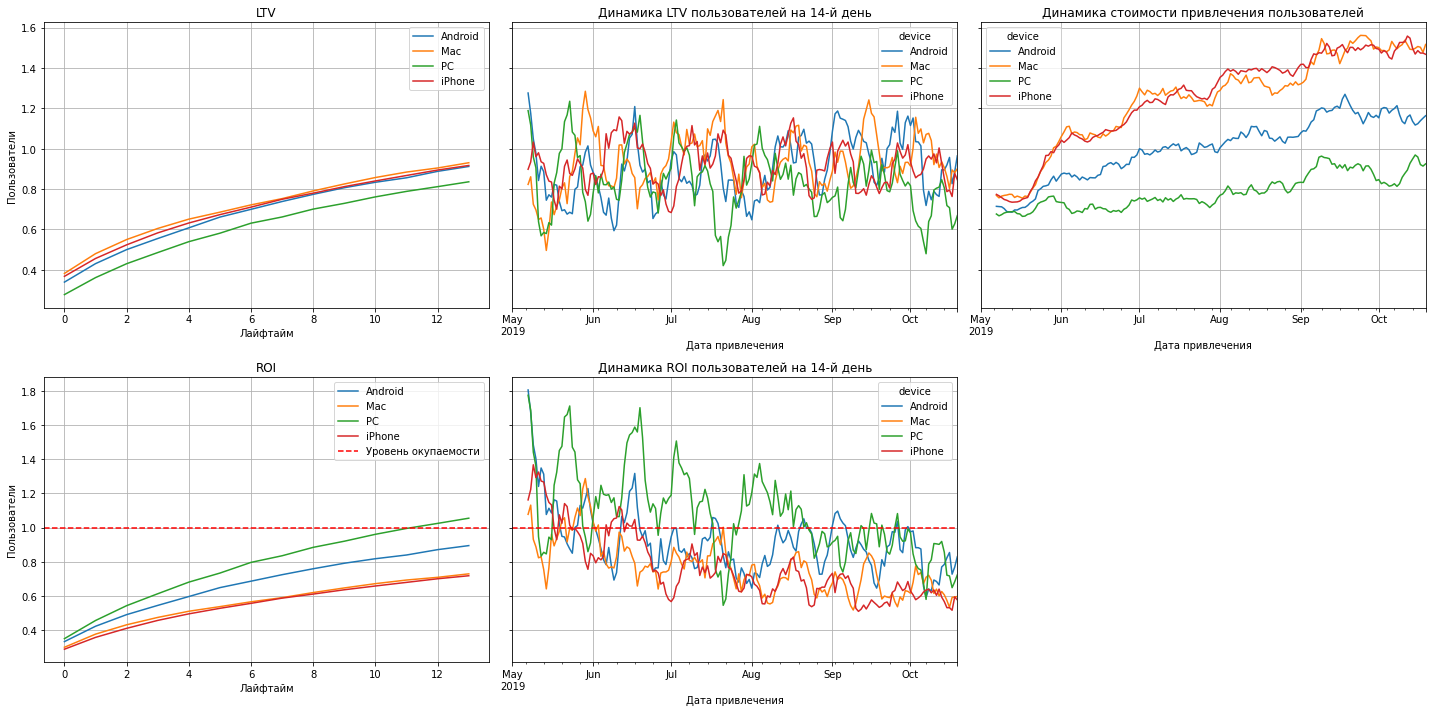

In [38]:
#добавим параметру dimensions столбец device
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Выводы:
* Реклама окупается только на PC.

* Cтоимость привлечения одного клиента продолжает расти на всех платформах. Особенно, пользователи с Mac и Iphone

* LTV везде также примерно одинаковый

* Хуже всего окупаются владельцы Mac и iPhone

### Окупаемость с разбивкой по странам

Рассмотрим окупаемость с разбивкой по странам

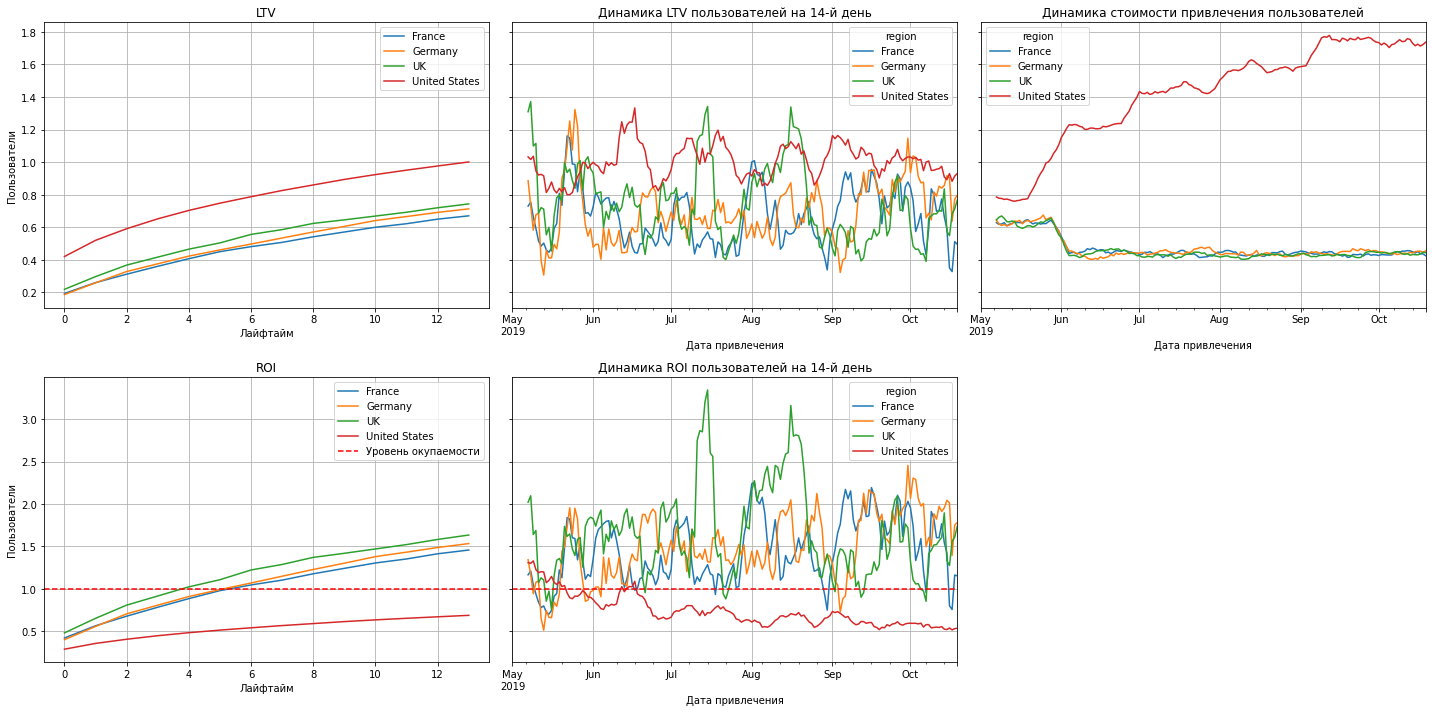

In [39]:
#добавим параметру dimensions столбец region
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Выводы:

* Реклама в США не окупается вообще. В том время как вся Европа окупается уже с 6 дня. Собственно, толку от пользователей из США для приложения не очень много. Видимо, они насколько быстро приходят, настолько быстро и уходят.

* В США стоимость пользователя растет, а в Европе, начиная с июня, держится стабильно низко

### Окупаемость рекламы с разбивкой по каналам рекламы

Рассмотрим окупаемость рекламы с разбивкой по рекламным каналам

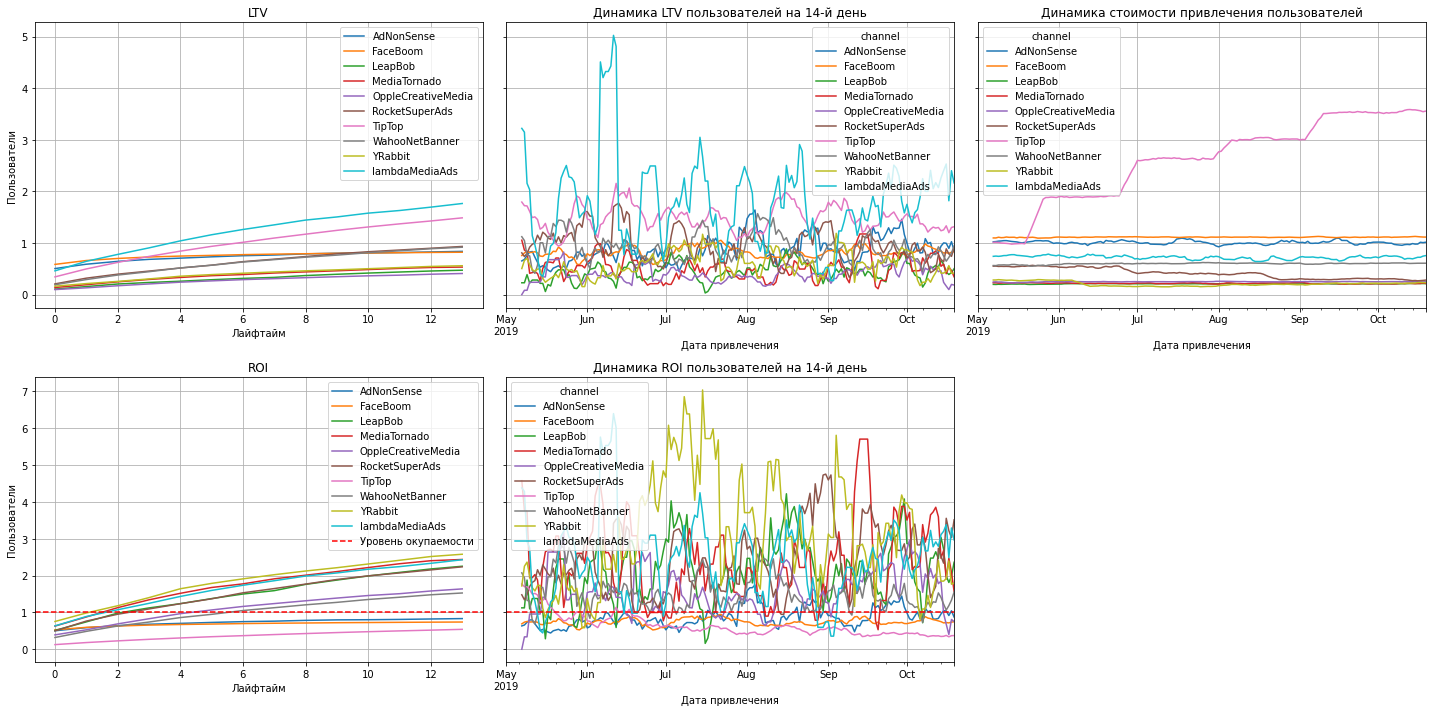

In [40]:
#добавим параметру dimensions столбец channel
# смотрим конверсию с разбивкой по каналам рекламы
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

Вывод:
* За исключением FaceBoom, AdNonSense и TipTop реклама окупается везде.

* CAC растет только в TipTop, что делает этот канал самым невыгодным для приложения. В остальных показатель держится стабильно низко и даже немного падает

* Показатели LTV везде примерно одинаково стабильные

## Конверсия и удержание пользователей 

### Конверсия и удержание пользователей с разбивкой по странам

Теперь посчитаем конверсию и удержание с разбивкой по странам, устройствам и рекламным каналам

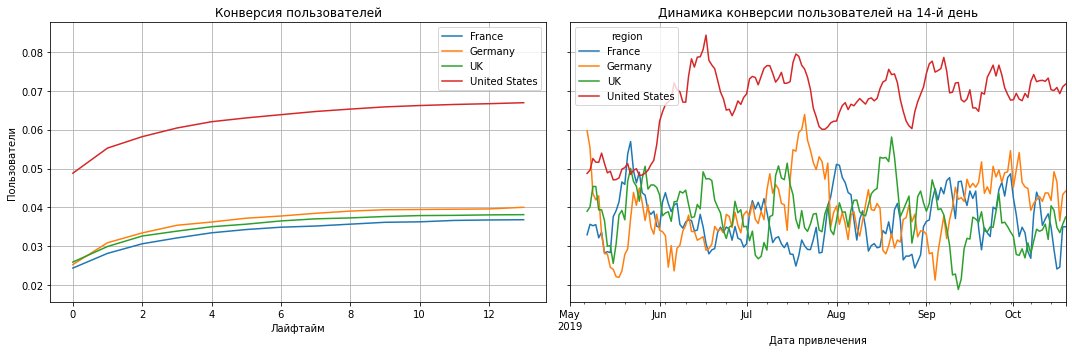

In [41]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Колласальное отличие США от Европы. Конверсия пользователей в США в полтора раза выше, чем конверсия европейских пользователей 

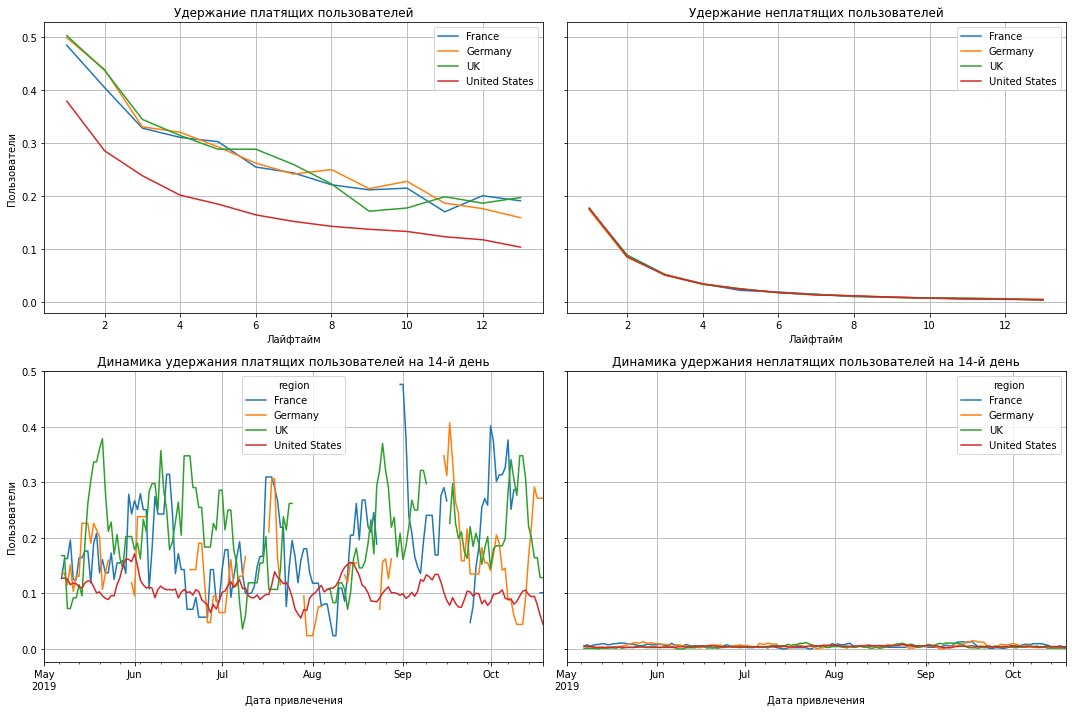

In [42]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удерживать пользователей из США приложению удается хуже всего. По ощущениям, просто привлекается не целевая аудитория приложения

### Конверсия и удержание с разбивкой по устройствам

Теперь взглянем на конверсию и удержание с разбивкой по устройствам

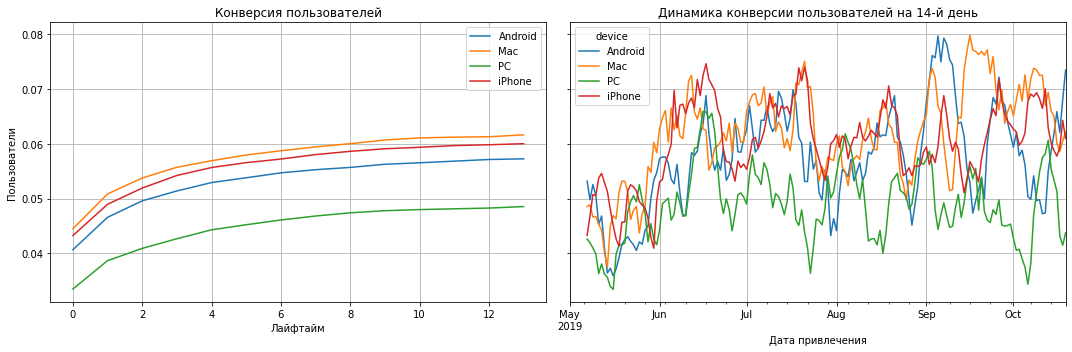

In [43]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наглядное лидерство "яблочных" устройств. Неудачнее всего привлекаются пользователи ПК

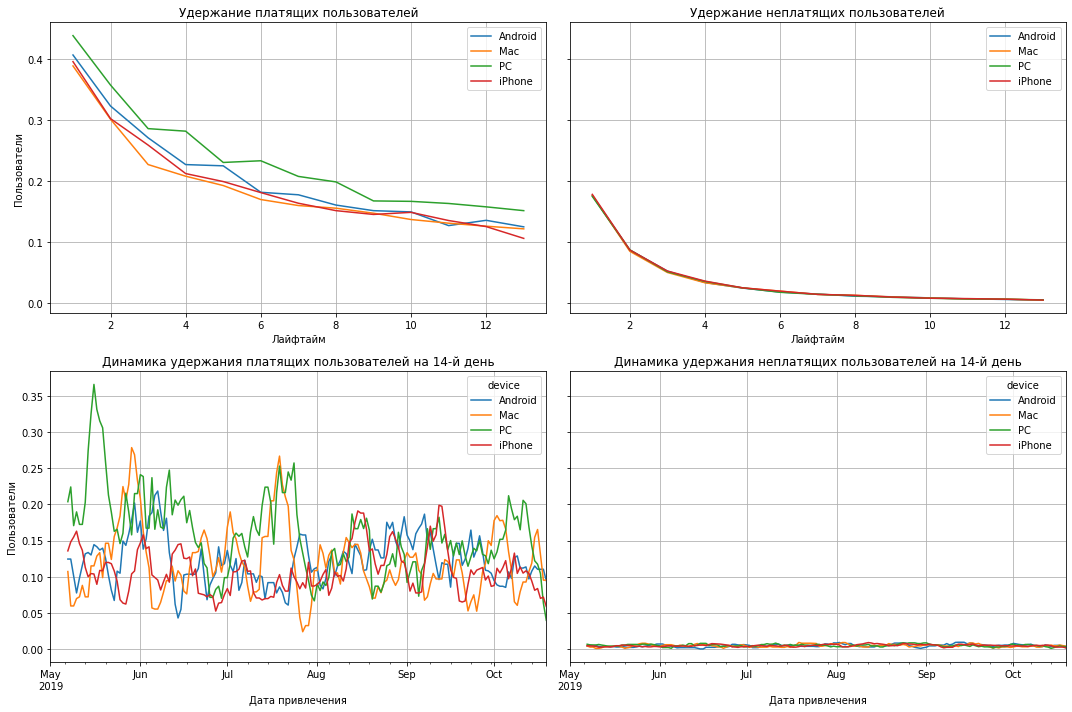

In [44]:
# посмотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей не сильно отличается, но платящие пользователи ПК удерживаются чуточку лучше

### Конверсия и удержание с разбивкой по каналам привлечения

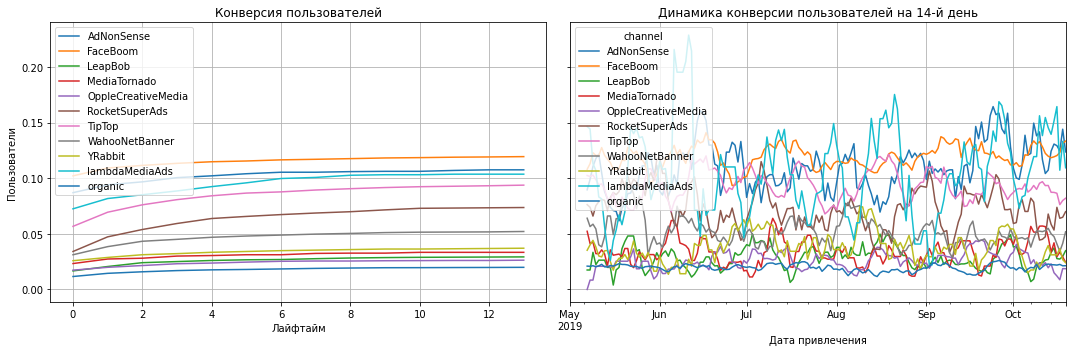

In [45]:
# посмотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Ярко выраженной динамики у всех пользователей в течение двухнедельного лайфтайма не наблюдается. Эффективнее всего конвертирются пользователи, которые пришли из Faceboom

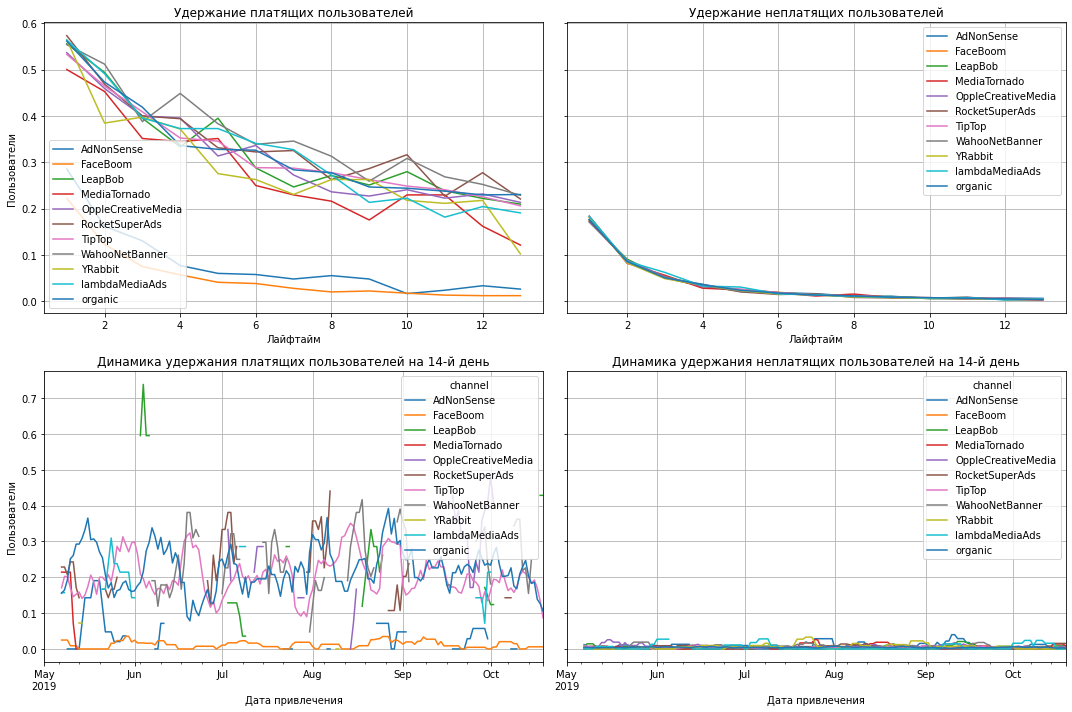

In [46]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Не смотря на хорошую конверсию, пользователи из FaceBoom удерживаются плохо, как и AdNonSense.

**Теперь постараемся ответить на вопросы:**



**1)Окупается ли реклама, направленная на привлечение пользователей в целом?**

Нет, в целом реклама не окупается. Связываю это с большим и, по большей части, безрезультатным вливанием денег в США. А также, с низкой окупаемостью этого региона;


**2)Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

По устройствам, с точки зрения конверсии, слабее всего аудитория с ПК, хотя она и неплохо удерживается. 

Пользователи из штатов хоть и стремительно конвертируются, однако также стремительно и уходят. Проблемы с удержанием платящих пользователей может оказывать негативное влияние на окупаемость рекламы.

Из платформ, найболее "токсичными" для рекламной кампании каналы Tip Top и FaceBoom. В исследованиях выше мы увидели, что цена за одного пользователя у этих каналов очень высокая, по сравнению с остальными каналами, однако эта цена ничем не оправдана

**3)Чем могут быть вызваны проблемы окупаемости?**
Некорректное распределение бюджета рекламной кампании

### Вывод

Мы проанализировали активность пользователей и эффективность трат на маркетинг за полгода.

В результате исследования было выявлено, что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom, TipTop в США и AdNonSence в Европе (топы по стоисмости за одного пользователя):

Учитывая горизонт событий, высокая стоимости привлечения у этих каналов не окупается;

Платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются, а расходы на привлечение в Tip Top выросли в несколько раз;

**Рекомендации:**

* Пересмотреть эффективность каналов привлечения: возможно, стоит отказаться от Tip Top или Face Boom и направить средства в другие каналы, с более заинтересованной в приложении аудитории. Например, можно посмотреть в сторону RocketSuperAds(в США) или lambdaMediaAds(в Европе) Они неплохо выглядят с точки зрения САС, привлечения, удержания и конверсии;

* Выяснить, почему именно у Tip Top такая высокая цена за одного пользователя. Если удасться это понять, возможно это поможет провести работы со своей стороны, чтобы сделать цену ниже, или же попросту не сотруджничать с аналогичными источниками привлечения, если это сделать не удастся.


* Обратить внимание на европейский рынок, возможно увеличить расходы там.
